# Pandas - Part 2

## 4. Groupby

`Groupby` allows you to group together rows based off of a column and perform an **aggregate** function on the.

In [2]:
import numpy as np
import pandas as pd

In [4]:
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [5]:
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [8]:
byComp = df.groupby('Company')
byComp.mean() # ignore non-numeric column

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [9]:
byComp.sum()

,Sales
Company,
FB,593
GOOG,320
MSFT,464


In [11]:
byComp.std().loc['FB']

Sales    75.660426
Name: FB, dtype: float64

In [12]:
byComp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [15]:
df.groupby('Company').describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

## 5. Merging, Joining, and Concatenating

There are 3 main ways of combining DataFrames together: `Mergeing`, `Joining` and `Concatenating`.

In [16]:
import pandas as pd

In [17]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                   'B':['B0','B1','B2','B3'],
                   'C':['C0','C1','C2','C3'],
                   'D':['D0','D1','D2','D3']},
                  index=[0,1,2,3])

In [18]:
df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                   'B':['B4','B5','B6','B7'],
                   'C':['C4','C5','C6','C7'],
                   'D':['D4','D5','D6','D7']},
                  index=[4,5,6,7])

In [19]:
df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                   'B':['B8','B9','B10','B11'],
                   'C':['C8','C9','C10','C11'],
                   'D':['D8','D9','D10','D11']},
                  index=[8,9,10,11])

### * Concatenation

Concatenation basically glues together DataFrames. Keep in mind that demensions should match along the axis you are cocatenating on.

In [21]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [22]:
pd.concat([df1,df2,df3],axis=1) # concat along columns

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


### * Merging

The **merge** function allows you to merge DataFrames together using a simlilar logic as merging SQL Tables together.


In [23]:
left = pd.DataFrame({'Key':['K0','K1','K2','K3'],
                   'A':['A0','A1','A2','A3'],
                   'B':['B0','B1','B2','B3']})

right = pd.DataFrame({'Key':['K0','K1','K2','K3'],
                   'C':['C0','C1','C2','C3'],
                   'D':['D0','D1','D2','D3']})

In [24]:
left

,A,B,Key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


In [25]:
right

,C,D,Key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [27]:
pd.merge(left,right,how='inner',on='Key')

,A,B,Key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [28]:
left2 = pd.DataFrame({'Key1':['K0','K0','K1','K3'],
                    'Key2':['K0','K1','K0','K1'],
                   'A':['A0','A1','A2','A3'],
                   'B':['B0','B1','B2','B3']})

right2 = pd.DataFrame({'Key1':['K0','K0','K1','K3'],
                    'Key2':['K0','K0','K0','K0'],
                   'C':['C0','C1','C2','C3'],
                   'D':['D0','D1','D2','D3']})

In [30]:
pd.merge(left2, right2, on=['Key1','Key2'])

,A,B,Key1,Key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A0,B0,K0,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


In [34]:
pd.merge(left2,right2,how='outer',on=['Key1','Key2'])

,A,B,Key1,Key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A0,B0,K0,K0,C1,D1
2,A1,B1,K0,K1,NaN,NaN
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K3,K1,NaN,NaN
5,NaN,NaN,K3,K0,C3,D3


In [37]:
pd.merge(left2,right2,how='right',on=['Key1','Key2']) # right is dominante

,A,B,Key1,Key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A0,B0,K0,K0,C1,D1
2,A2,B2,K1,K0,C2,D2
3,NaN,NaN,K3,K0,C3,D3


In [35]:
pd.merge(left2,right2,how='left',on=['Key1','Key2'])

,A,B,Key1,Key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A0,B0,K0,K0,C1,D1
2,A1,B1,K0,K1,NaN,NaN
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K3,K1,NaN,NaN


### * Joining

Joining is a convenient method for combine the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

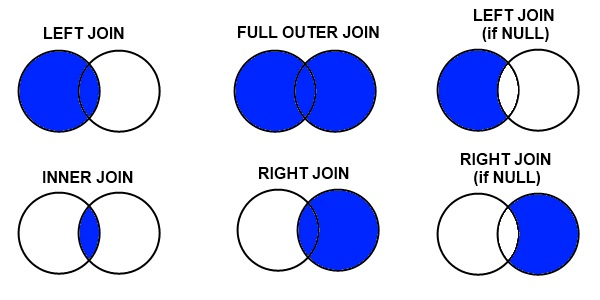

In [42]:
left = pd.DataFrame({'A':['A0','A1','A2'],
                   'B':['B0','B1','B2']},
                  index=['K0','K1','K2'])

right = pd.DataFrame({'C':['C0','C2','C3'],
                   'D':['D0','D2','D3']},
                  index=['K0','K2','K3'])

In [43]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [44]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


### merge vs join

These are the main differences between `df.join()` and `df.merge()`:

* lookup on right table: `df1.join(df2)` always joins via the **index** of `df2`, but `df1.merge(df2)` can join to one or more columns of `df2` (default) or to the index of `df2` (with `right_index=True`).

* lookup on left table: by default, `df1.join(df2)` uses the **index** of `df1` and `df1.merge(df2)` uses **column(s)** of `df1`. That can be overridden by specifying `df1.join(df2, on=key_or_keys)` or `df1.merge(df2, right_index=True)`.

* left vs inner join: `df1.join(df2)` does a **left join** by default (keeps all rows of `df1`), but `df.merge` does an **inner join** by default (returns only matching **rows** of `df1` and `df2`).